<a href="https://colab.research.google.com/github/sourabhtambi/-Spam-Email-Message-Classifier/blob/main/Spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [158]:
import numpy as np
import pandas as pd

In [159]:
df = pd.read_csv('spam.csv',encoding = 'latin-1')

In [160]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4618,ham,"Sorry, I'll call later In meeting.",NaN,NaN,NaN
899,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
2726,ham,No i am not having not any movies in my laptop,NaN,NaN,NaN
179,ham,Hi! You just spoke to MANEESHA V. We'd like to...,NaN,NaN,NaN
2179,ham,And popping &lt;#&gt; ibuprofens was no help.,NaN,NaN,NaN


In [161]:
df.shape

(5572, 5)

In [162]:
# Data Cleaning
# EDA
# Text Preprocessing
# Model Building
# Evaluation
# Improvement
# Website
# deploy

# **Data Cleaning**

In [163]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [164]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3' , 'Unnamed: 4'], inplace = True)

In [165]:
df.rename(columns = {'v1' : 'target' , 'v2' : 'text'}, inplace = True )

In [166]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [167]:
df['target'] = encoder.fit_transform(df['target'])

In [168]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [169]:
df.isnull().sum()

,0
target,0
text,0


In [170]:
df.duplicated().sum()

np.int64(403)

In [171]:
df.drop_duplicates(keep = 'first')

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [172]:
df.shape

(5572, 2)

# **EDA**

In [173]:
df['target'].value_counts()

,count
target,
0,4825
1,747


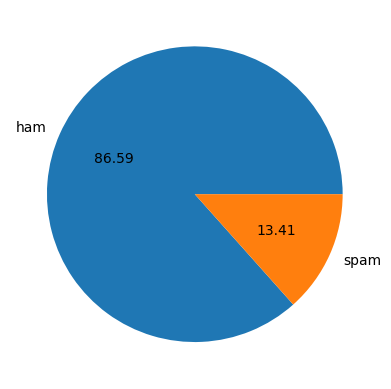

In [174]:
import matplotlib.pyplot as plt

plt.pie(df['target'].value_counts() , labels = ['ham','spam'], autopct = "%0.2f")

plt.show()

In [175]:
#Data is imbalance

In [176]:
# creatinf 3 new fetures into out data set df
!pip install nltk

In [177]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [178]:
#Characters
df['num_characters'] = df['text'].apply(len)

In [179]:
# number of words
df['num_words'] = df['text'].apply( lambda x : len(nltk.word_tokenize(x)))

In [180]:
# number of sentences
df['num_sentences'] = df['text'].apply( lambda x : len(nltk.sent_tokenize(x)))

In [181]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5572.000000,5572.000000,5572.000000
mean,80.118808,18.699390,1.996411
std,59.690841,13.741932,1.520159
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.500000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


In [182]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.276269,1.837720
std,58.016023,13.988585,1.454388
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [183]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.021419
std,29.183082,6.867007,1.537580
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [184]:
# Spam massages are genrally big
import seaborn as sns


<Axes: xlabel='num_characters', ylabel='Count'>

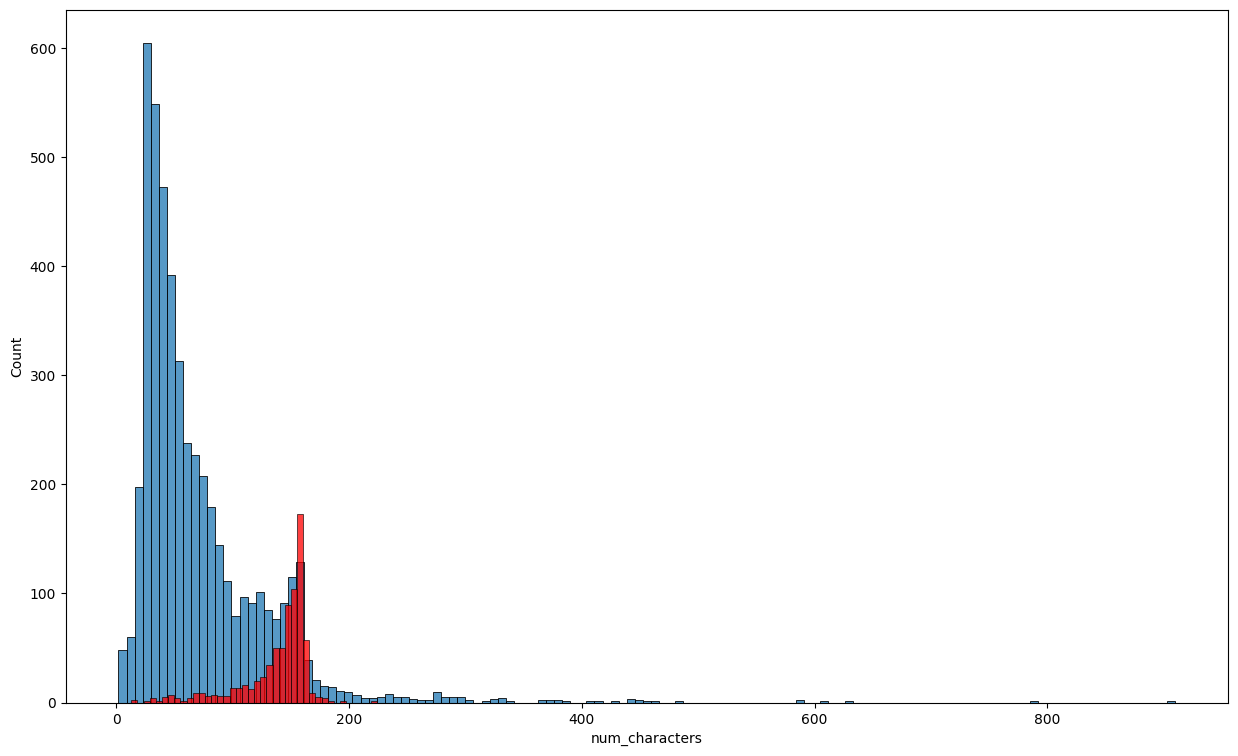

In [185]:
plt.figure(figsize = (15,9))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color = 'red')

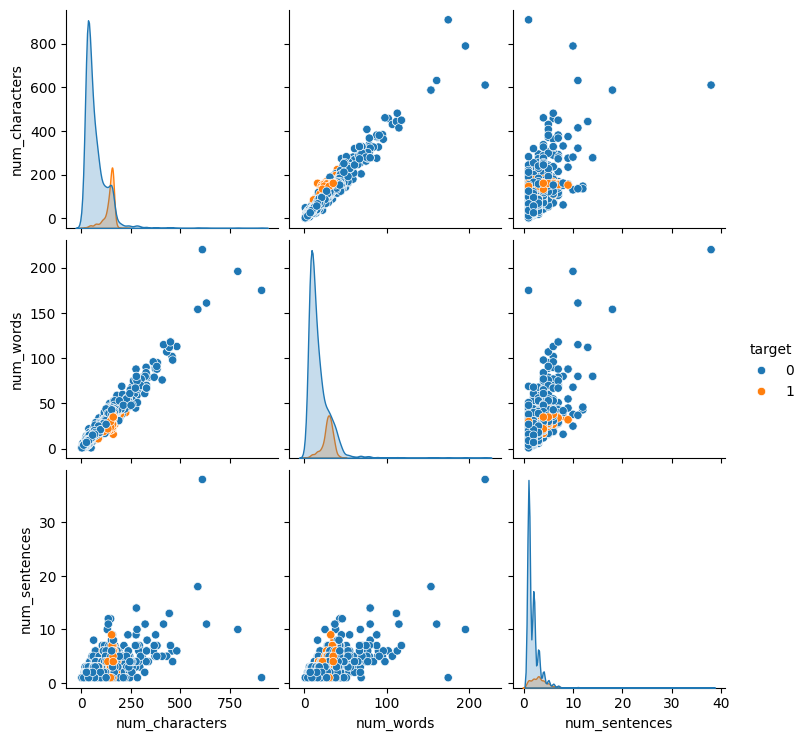

In [186]:
sns.pairplot(df,hue = 'target')

<Axes: >

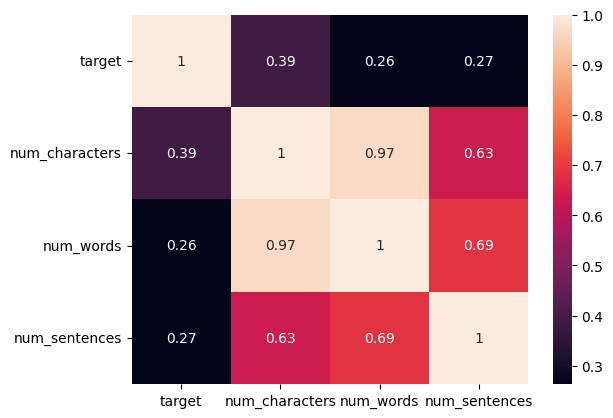

In [187]:
# select_dtypes includes only numbers (ints and floats)
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True)

In [188]:
# Relation between each column to some is high , so we will go with num_character to target


# **Data preprocessing**
1.Lower case
2.tokenization
3.Removing stop words and punctuation
4.Stemming - ek type ke words ( dance , dancing , danced) ek word bana dena

In [189]:
# we will build a new function that will perform all these steps
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# You must initialize the stemmer before using it in the function
ps = PorterStemmer()

# Ensure you have downloaded the necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [190]:
def  transform_text(text):
  text = text.lower() #1
  text = nltk.word_tokenize(text) #2

  y = []

  for i in text :                 #3
    if i .isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text: #4
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text = y[:]
  y.clear()

  for i in text: #5
    y.append(ps.stem(i))

  return " ".join(y)



In [191]:
# Buildint WordCloud <- It will make Important words Big
df['transformed_text'] = df['text'].apply(transform_text)

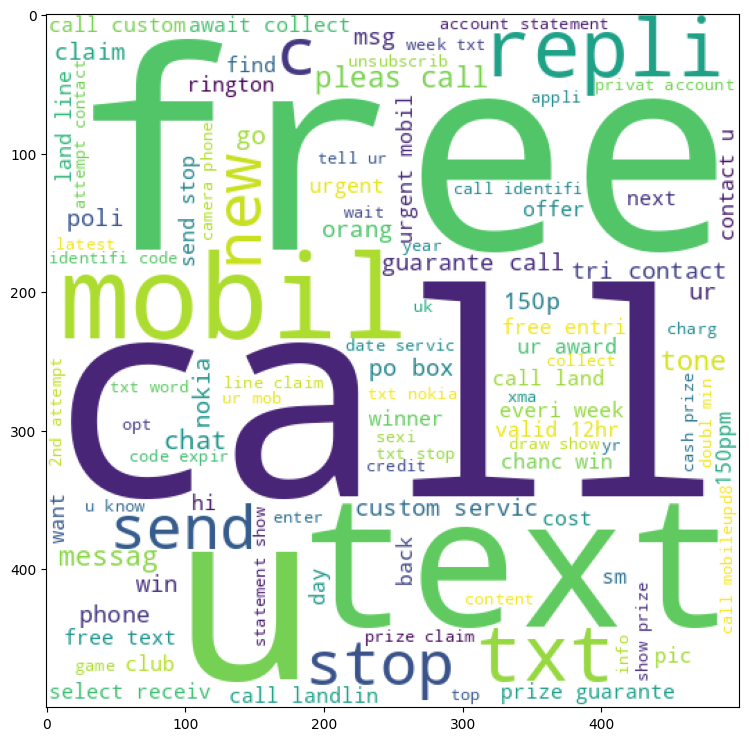

In [192]:
from wordcloud import WordCloud
wc = WordCloud(width = 500 , height = 500 ,min_font_size = 10 , background_color = 'white')

spam_wc =wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (10,9))
plt.imshow(spam_wc)

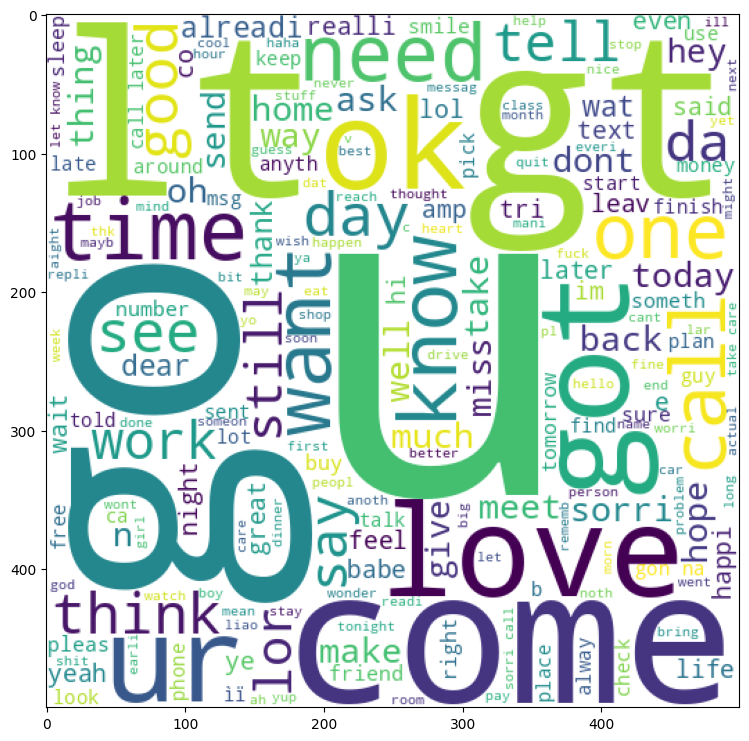

In [193]:
ham_wc =wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (10,9))
plt.imshow(spam_wc)

# **4. Model Building**

In [194]:
#Naive Based alogrithem

from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [195]:
# X = cv.fit_transform(df['transformed_text']).toarray()
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

In [196]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state =2)

In [197]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [198]:
gnb.fit(X_train ,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8690582959641255
[[844 113]
 [ 33 125]]
0.5252100840336135


In [199]:
mnb.fit(X_train ,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.957847533632287
[[957   0]
 [ 47 111]]
1.0


In [200]:
bnb.fit(X_train ,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9695067264573991
[[956   1]
 [ 33 125]]
0.9920634920634921
